# **Assignment 6: Providing Data-driven Suggestions for HR**

This assignment is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

Stages of workflow

- Plan
- Analyze
- Construct
- Execute

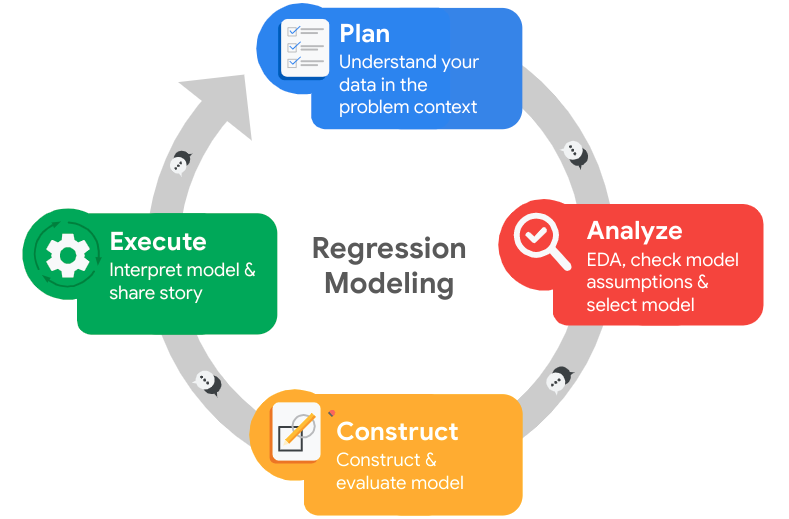



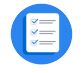  

# Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it may be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables:

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage?




Stakeholders are the investors/top management for the company

Trying to assess the reasons why employees are leaving, need to check relationships between satisfaction levels, time spent at company, whether or not they had an accident at work, whether or not they got promoted in the last 5 years, which department they work for could influence their decision to leave and the salary, are people who are getting payed less more likely to leave?



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

### Load dataset

In [ ]:
# Load dataset into a dataframe
### YOUR CODE HERE ###
original= pd.read_csv("HR_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
original

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ###
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
original.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ###
original.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###
data_1 = original.rename(columns = {"number_project" : "projects","Work_accident" : "work_accident" ,"average_montly_hours ": "average_monthly_hours", "time_spend_company" : "time_spent_company", "promotion_last_5years": "promotion"})
data = data_1.rename(columns = {"average_montly_hours" : "average_monthly_hours", "Department" : "department"})
# Display all column names after the update
### YOUR CODE HERE ###
data.columns

Index(['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

satisfaction_level       0
last_evaluation          0
projects                 0
average_monthly_hours    0
time_spent_company       0
work_accident            0
left                     0
promotion                0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
data[data.duplicated()]

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

dropped_data = data.drop_duplicates().reset_index(drop = True)
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
dropped_data

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

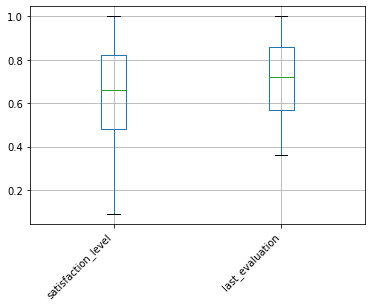

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###

dropped_data.boxplot(column = ["satisfaction_level", "last_evaluation"])
plt.xticks(rotation=45, horizontalalignment='right')

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

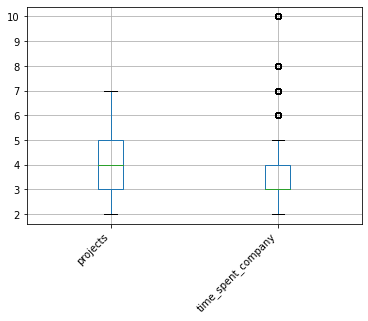

In [ ]:
#Dectect outliers for people who have left and whether or not people received a promotion

dropped_data.boxplot(column = ["projects", "time_spent_company"])
plt.xticks(rotation=45, horizontalalignment='right')

(array([1]), <a list of 1 Text major ticklabel objects>)

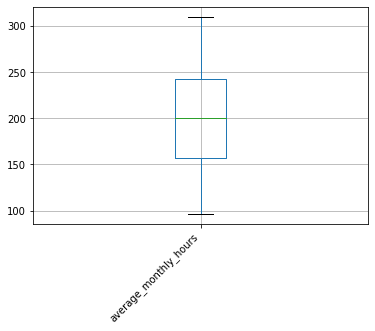

In [ ]:
dropped_data.boxplot(column = ["average_monthly_hours"])
plt.xticks(rotation=45, horizontalalignment='right')

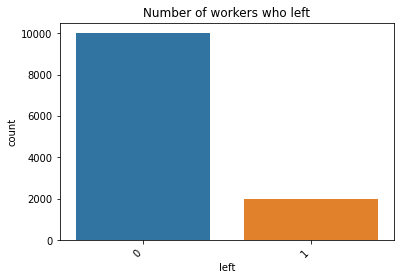

In [ ]:
sn.countplot(x = "left", data = dropped_data)
plt.title("Number of workers who left")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

(array([1]), <a list of 1 Text major ticklabel objects>)

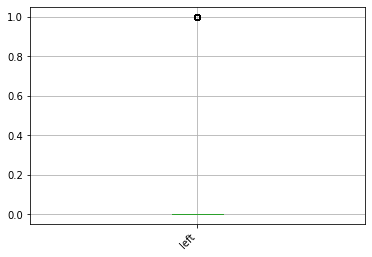

In [ ]:
dropped_data.boxplot(column = ["left"])
plt.xticks(rotation=45, horizontalalignment='right')

In [ ]:
dropped_data["left"].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [ ]:
#83.4% of workers stayed and 16.6% of workers left the company at the time the data was taken
#I wonder how far this data spans? (eg: From the start of the company, last 5 years or for each individual's time at the company, that could influence the outliers. If we only subject it to the last 5-10 years then we can have a sample space that would help get a better analysis. Some data may be lost though)

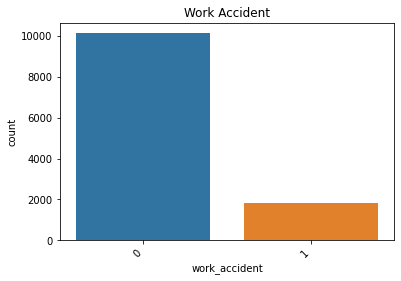

In [ ]:
sn.countplot(x = "work_accident", data = dropped_data)
plt.title("Work Accident")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

(array([1]), <a list of 1 Text major ticklabel objects>)

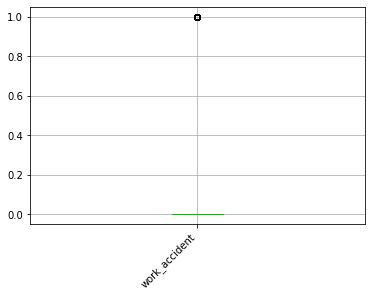

In [ ]:
dropped_data.boxplot(column = ["work_accident"])
plt.xticks(rotation=45, horizontalalignment='right')

In [ ]:
dropped_data["work_accident"].value_counts(normalize = True)

0    0.845718
1    0.154282
Name: work_accident, dtype: float64

In [ ]:
#84.6% of workers did not have an accident at work (Great)
#15.4% of workers had an accident at work. This is a small number but should be smaller, however I don't think this is why people would leave

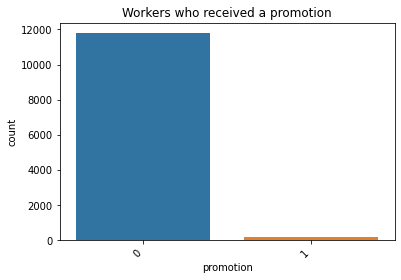

In [ ]:
sn.countplot(x = "promotion", data = dropped_data)
plt.title("Workers who received a promotion")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
dropped_data["promotion"].value_counts(normalize = True)

0    0.983071
1    0.016929
Name: promotion, dtype: float64

In [ ]:
#Only 1.6% of workers are getting promotions in the company. Perhaps this is what is making workers leave? Could decrease morale and workers could feel unappreciated

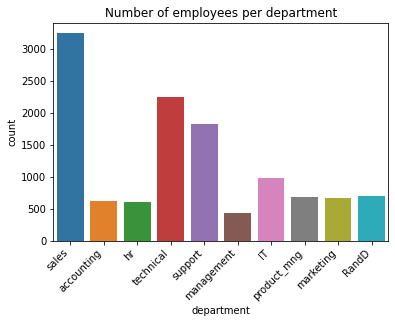

In [ ]:
sn.countplot(x = "department", data = dropped_data)
plt.title("Number of employees per department")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#The largest department seems to be sales, followed by technical, followed by support then IT
#Management seems to have the least number of employees
#Accounting, HR, Product management, Marketing and RanD seem to all have the same number of employees
#Could there be a relationship between the department with the most number of employees, their salaries, the promotions and maybe that's why people are leaving?
#Departments with few employees could prove to be overloaded with work and people could leave because of burnout
#Overly saturated departments could see employees wanting a greater challenge and thus leaving.

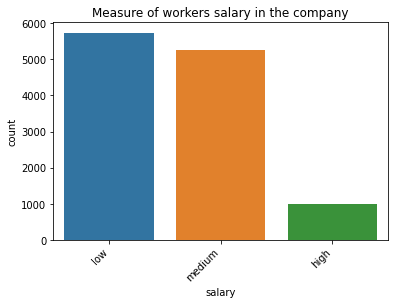

In [ ]:
sn.countplot(x = "salary", data = dropped_data)
plt.title("Measure of workers salary in the company")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
dropped_data["salary"].value_counts(normalize = True)

low       0.478692
medium    0.438746
high      0.082562
Name: salary, dtype: float64

In [ ]:
#The highest earners comprise of only 8% of the company and results show that 47% of the company are amongst low-earners. This could be a reason for leaving.

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

def find_outliers_IQR(df):

   q1=dropped_data.quantile(0.25)

   q3=dropped_data.quantile(0.75)

   IQR=q3-q1

   outliers = dropped_data[((df<(q1-1.5*IQR)) | (dropped_data>(q3+1.5*IQR)))]

   return outliers



In [ ]:
outliers = find_outliers_IQR(dropped_data[['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion', 'department', 'salary']]).sum()

outliers

<ipython-input-30-a152d94ea372>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = dropped_data[((df<(q1-1.5*IQR)) | (dropped_data>(q3+1.5*IQR)))]


satisfaction_level          0.0
last_evaluation             0.0
projects                    0.0
average_monthly_hours       0.0
time_spent_company       5628.0
work_accident            1850.0
left                     1991.0
promotion                 203.0
department                    0
salary                        0
dtype: object

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

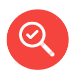
# Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [ ]:
#Outliers may have valuable information such as workers getting an accident. Ethically, I cannot remove these as we might need this information to correct systems and policies which will create a safer environment for workers and reduce any possible threat of any legal action
#Furthermore, the time spent at the company could give a good indication as to whether or not people are leaving because they are at the retirement age or they are fed up
#Outliers for people who left and people who received promotions could indicate the satisfaction of the company. Before deciding to remove, keep or limit outliers, I would like to see the normal distribution of the data

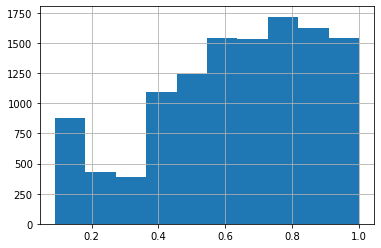

In [ ]:
#See distribution of the data
dropped_data["satisfaction_level"].hist()
plt.show()

In [ ]:
#The data for the satisfaction level is right skewed confirming outliers but confirms more imployees are satisfied than unsatisfied

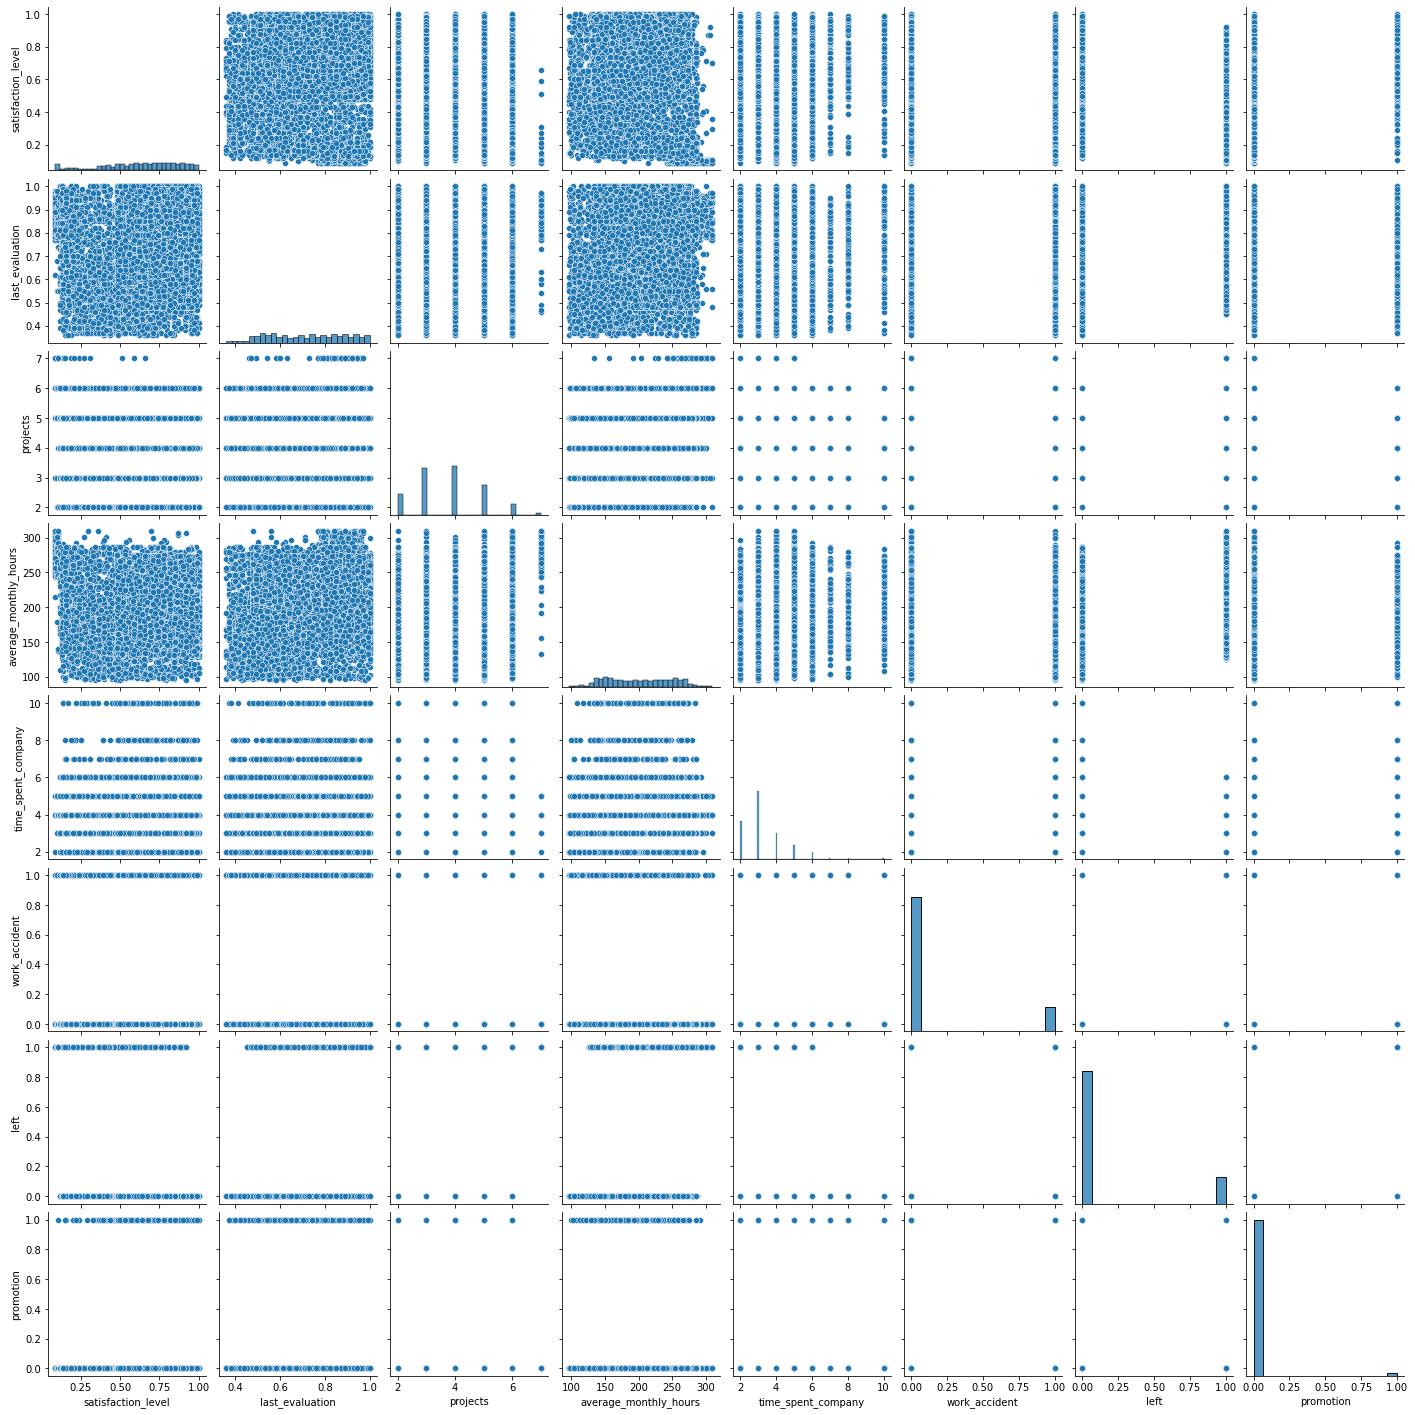

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
sn.pairplot(dropped_data)

In [ ]:
#Get columns
dropped_data.columns

Index(['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion', 'department', 'salary'],
      dtype='object')

In [ ]:
X = dropped_data[['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident','promotion', 'department', 'salary']]


In [ ]:
X.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,promotion,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [ ]:
y = dropped_data[['left']]
y.head()

,left
0,1
1,1
2,1
3,1
4,1


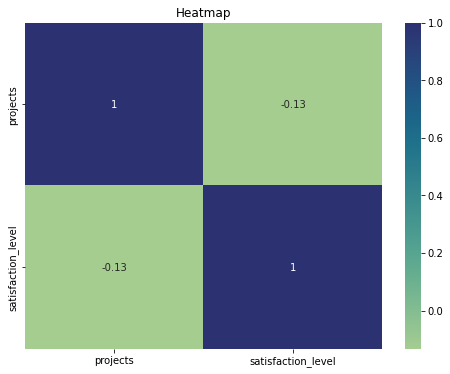

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sn.heatmap(X[["projects", "satisfaction_level"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()



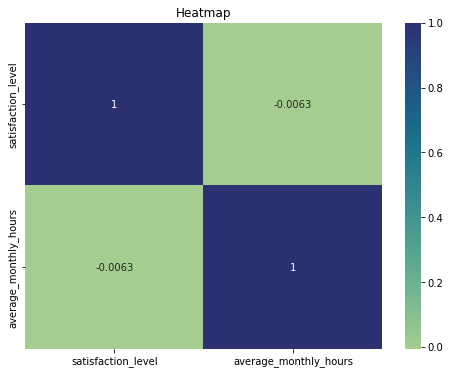

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(X[["satisfaction_level", "average_monthly_hours"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()


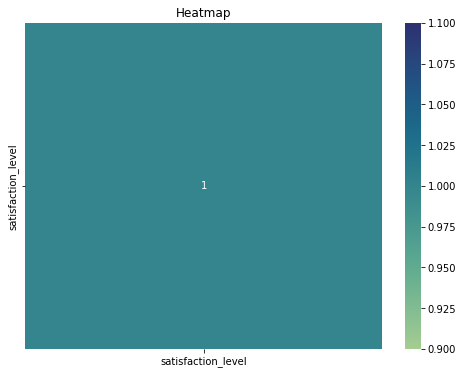

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(X[["department", "satisfaction_level"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()


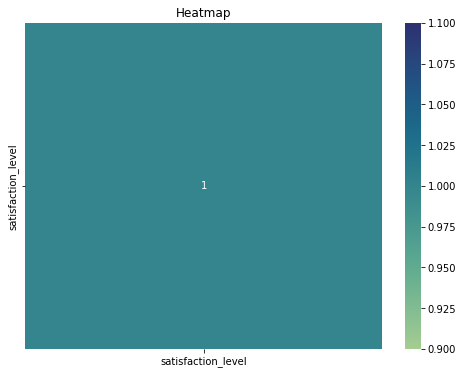

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(X[["salary", "satisfaction_level"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()


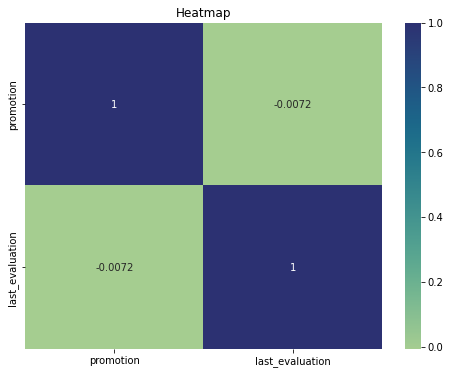

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(X[["promotion", "last_evaluation"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()


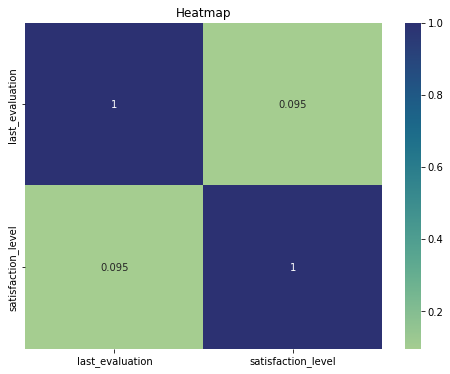

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(X[["last_evaluation", "satisfaction_level"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap")
plt.show()


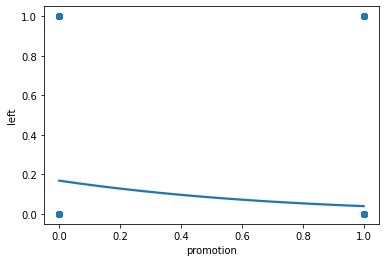

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

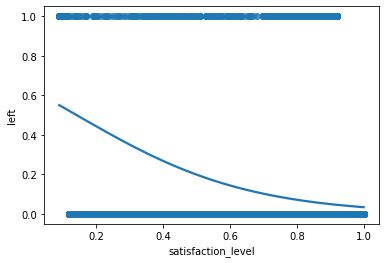

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###



In [ ]:
#Create a plot as needed

OneHotEncoder(drop='first').fit_transform(dropped_data[['salary']])

<11991x2 sparse matrix of type '<class 'numpy.float64'>'
	with 11001 stored elements in Compressed Sparse Row format>

In [ ]:
OneHotEncoder(drop='first').fit_transform(dropped_data[['salary']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
dropped_data['salary'] = OneHotEncoder(drop='first').fit_transform(dropped_data[['salary']]).toarray()

In [ ]:
dropped_data.head(10)

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,1.0
5,0.41,0.50,2,153,3,0,1,0,sales,1.0
6,0.10,0.77,6,247,4,0,1,0,sales,1.0
7,0.92,0.85,5,259,5,0,1,0,sales,1.0
8,0.89,1.00,5,224,5,0,1,0,sales,1.0
9,0.42,0.53,2,142,3,0,1,0,sales,1.0


In [ ]:

OneHotEncoder(drop='first').fit_transform(dropped_data[['salary']])

In [ ]:
OneHotEncoder(drop='first').fit_transform(dropped_data[['salary']]).toarray()

In [ ]:
OneHotEncoder(drop='sec').fit_transform(dropped_data[['department']])


<11991x9 sparse matrix of type '<class 'numpy.float64'>'
	with 11015 stored elements in Compressed Sparse Row format>

In [ ]:
OneHotEncoder(drop='first').fit_transform(dropped_data[['department']]).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dropped_data.head(n=5)

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,1.0


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

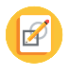
#Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
##Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model, and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

I have decided to leave the outliers due to the fact that the longer a person is in the company could be a reason for them leaving. Furthermore, how much they earn and their promotion also seems to affect their decision to leave the company.

 Need to predict whether the satisfaction_level	last_evaluation	projects	average_monthly_hours	time_spent_company	work_accident	promotion	department	salary (INDEPENT VARIABLES) are the reason someone leaves (dependent variable)

### Identify the types of models most appropriate for this task.

A logistic regression model will be necessary to check what values correlate and which don't

A correlation table will also verify the results obtained


### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
X = dropped_data[['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident','promotion', 'salary']]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,promotion,salary
0,0.38,0.53,2,157,3,0,0,1.0
1,0.80,0.86,5,262,6,0,0,0.0
2,0.11,0.88,7,272,4,0,0,0.0
3,0.72,0.87,5,223,5,0,0,1.0
4,0.37,0.52,2,159,3,0,0,1.0


In [ ]:
y =dropped_data[["left"]]

In [ ]:
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spent_company,work_accident,promotion,salary
6293,0.68,0.79,5,139,4,0,0,1.0
4134,1.00,1.00,5,142,4,0,0,1.0
8227,0.56,0.80,5,202,4,0,0,1.0
7927,0.51,0.71,4,208,3,1,0,1.0
8538,0.70,0.57,5,247,3,0,0,1.0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 8), (2998, 8), (8993, 1), (2998, 1))

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


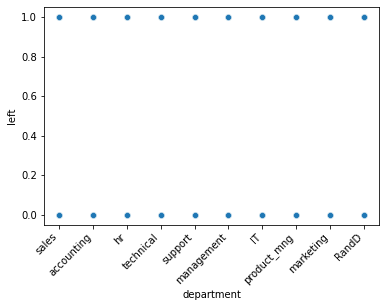

In [ ]:
sn.scatterplot(data=dropped_data, x="department", y="left")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

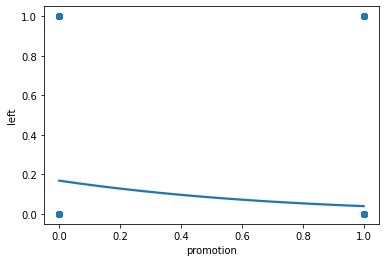

In [ ]:
### YOUR CODE HERE ###
sn.regplot(x="promotion", y="left", data=dropped_data, logistic=True, ci=None);

In [ ]:
#Employees who were promoted more were less likely to leave

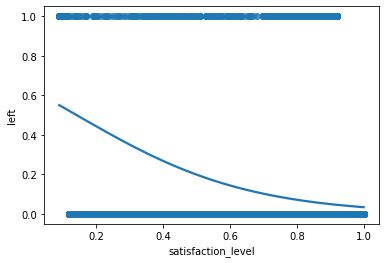

In [ ]:
sn.regplot(x="satisfaction_level", y="left", data = dropped_data, logistic = True, ci=None);

In [ ]:
#The less satisfied employees are most likely to leave

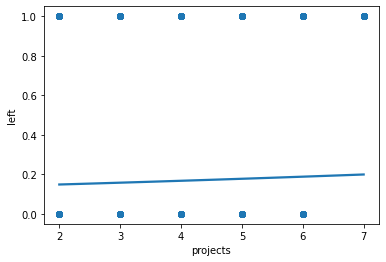

In [ ]:
sn.regplot(x="projects", y="left", data=dropped_data, logistic=True, ci=None);

In [ ]:
#Employees with more projects are more likely to leave

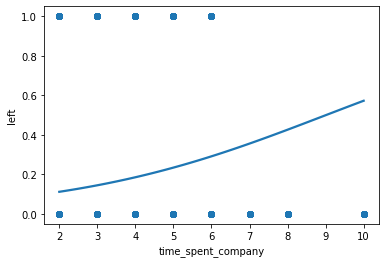

In [ ]:
sn.regplot(x="time_spent_company", y="left", data=dropped_data, logistic=True, ci=None);

In [ ]:
#Employees who served longer are less likely to stay in the company

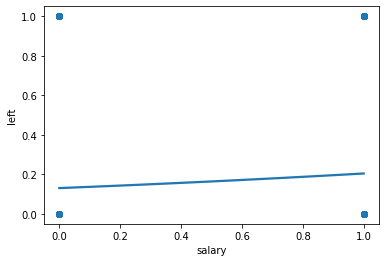

In [ ]:

sn.regplot(x="salary", y="left", data=dropped_data, logistic=True, ci=None);

In [ ]:
#Relationship between a higher salary and leaving is quite weak, showing that employees that are paid more are less likely to leave

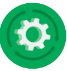
#Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
##Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

##Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

There is a small percentage of workers who will leave

Promotions, greater pay, less projects, less time spent at the company and a bigger paycheck keeps morale